In [1]:
import numpy as np

In [2]:
def find_sphere_center(points, r):
    N = len(points)
    A = []
    b = []

    # Choose the first point as reference
    x1, y1, z1 = points[0]

    for i in range(1, N):
        x, y, z = points[i]
        A.append([x - x1, y - y1, z - z1])
        b.append(0.5 * (x**2 + y**2 + z**2 - x1**2 - y1**2 - z1**2))

    A = np.array(A)
    b = np.array(b)

    # Solve the linear system A * [x_c, y_c, z_c] = b
    center = np.linalg.lstsq(A, b, rcond=None)[0]

    return center


In [3]:
import pickle

# load exp3_marker_data.pickle
with open('exp3_marker_data.pickle', 'rb') as f:
    data = pickle.load(f)

timestamps = np.array(data['timestamps'])
timestamps -= timestamps[0]
marker_positions = data['positions']


In [4]:
center = np.zeros((len(timestamps), 3))
for i, positions in enumerate(marker_positions):
    positions = np.array(positions)/1000.0
    median = np.median(positions, axis=0)
    positions = np.array([p for p in positions if np.linalg.norm(p - median) < 0.1])
    if len(positions) <= 4:
        center[i] = center[i-1]
    else:
        center[i] = find_sphere_center(positions, 0.4225)

Text(0.5, 1.0, 'Center of the sphere')

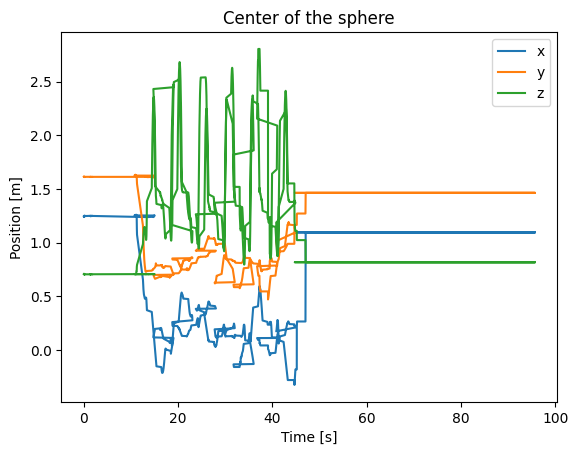

In [5]:
import matplotlib.pyplot as plt
plt.plot(timestamps, center[:, 0], label='x')
plt.plot(timestamps, center[:, 1], label='y')
plt.plot(timestamps, center[:, 2], label='z')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.title('Center of the sphere')